# Data Visualization with Matplotlib and Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Using long-view data

In [2]:
mortality_long = pd.read_pickle('mortality_prepped.pkl')
mortality_long.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [3]:
mortality_long.tail()

,Year,AgeGroup,DeathRate,MeanCentered
471,2014,15-19 Years,45.5,-147.42416
472,2015,15-19 Years,48.3,-144.62416
473,2016,15-19 Years,51.2,-141.72416
474,2017,15-19 Years,51.5,-141.42416
475,2018,15-19 Years,49.2,-143.72416


<AxesSubplot:>

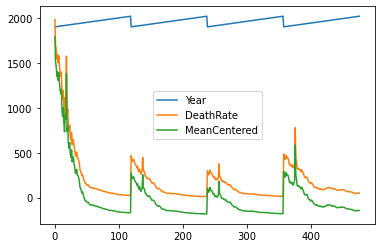

In [4]:
mortality_long.plot()
# pandas .plot() method takes the dataframe index as x-asis by default and plots lineplots of all the numeric columns

<AxesSubplot:xlabel='AgeGroup'>

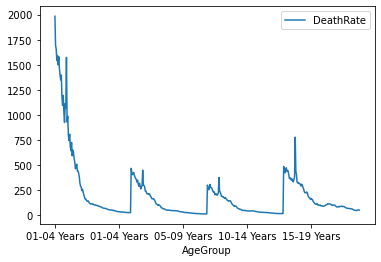

In [5]:
mortality_long.plot(x='AgeGroup', y='DeathRate')

<AxesSubplot:xlabel='Year'>

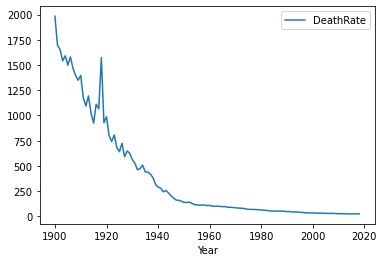

In [6]:
mortality_long[mortality_long['AgeGroup']=='01-04 Years'].plot(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year', ylabel='DeathRate'>

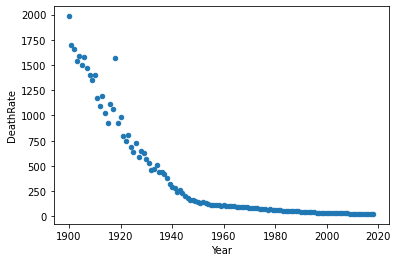

In [7]:
#mortality_long[mortality_long['AgeGroup']=='01-04 Years'].plot(x='Year', y='DeathRate', kind='scatter')
mortality_long[mortality_long['AgeGroup']=='01-04 Years'].plot.scatter(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year', ylabel='DeathRate'>

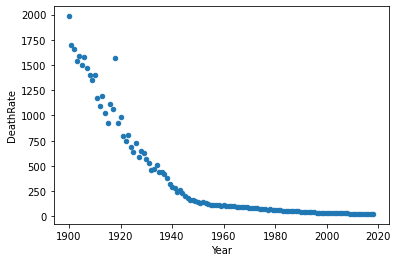

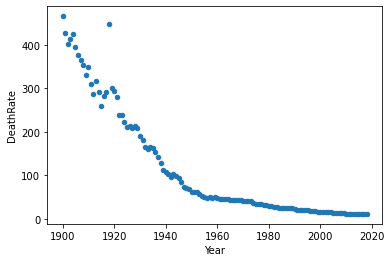

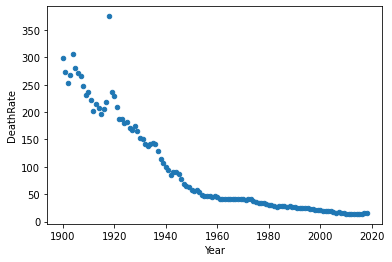

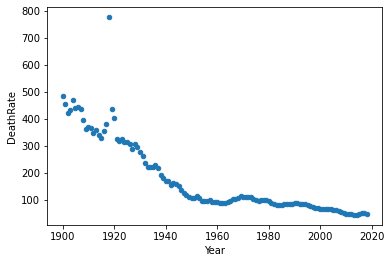

In [8]:
mortality_long[mortality_long['AgeGroup']=='01-04 Years'].plot.scatter(x='Year', y='DeathRate')
mortality_long[mortality_long['AgeGroup']=='05-09 Years'].plot.scatter(x='Year', y='DeathRate')
mortality_long[mortality_long['AgeGroup']=='10-14 Years'].plot.scatter(x='Year', y='DeathRate')
mortality_long[mortality_long['AgeGroup']=='15-19 Years'].plot.scatter(x='Year', y='DeathRate')

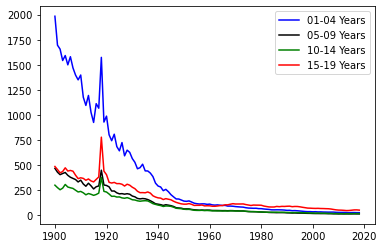

In [9]:
# using matplotlib
plt.plot(mortality_long[mortality_long['AgeGroup']=='01-04 Years']['Year'], mortality_long[mortality_long['AgeGroup']=='01-04 Years']['DeathRate'], 'b',
         mortality_long[mortality_long['AgeGroup']=='05-09 Years']['Year'], mortality_long[mortality_long['AgeGroup']=='05-09 Years']['DeathRate'], 'k',
         mortality_long[mortality_long['AgeGroup']=='10-14 Years']['Year'], mortality_long[mortality_long['AgeGroup']=='10-14 Years']['DeathRate'], 'g',
         mortality_long[mortality_long['AgeGroup']=='15-19 Years']['Year'], mortality_long[mortality_long['AgeGroup']=='15-19 Years']['DeathRate'], 'r')
plt.legend(['01-04 Years', '05-09 Years', '10-14 Years', '15-19 Years'])

### Using wide-view data (pivot table)

In [10]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


<AxesSubplot:xlabel='Year'>

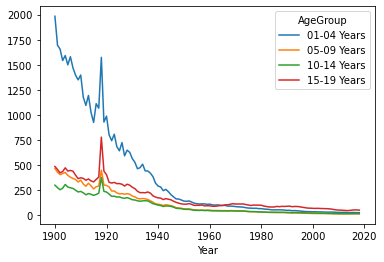

In [11]:
mortality_wide.plot()

<AxesSubplot:xlabel='Year'>

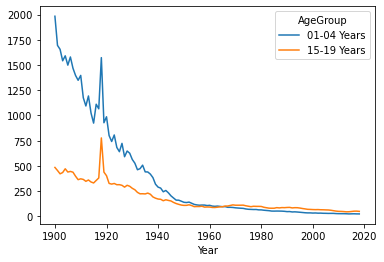

In [12]:
mortality_wide.plot.line(y=['01-04 Years','15-19 Years'])

### Line and area plots

<AxesSubplot:xlabel='Year'>

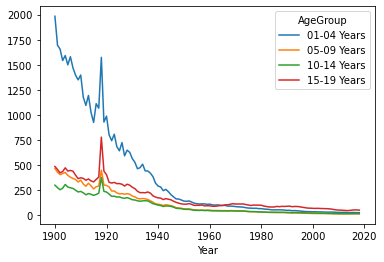

In [13]:
mortality_wide.plot.line()

<AxesSubplot:xlabel='Year'>

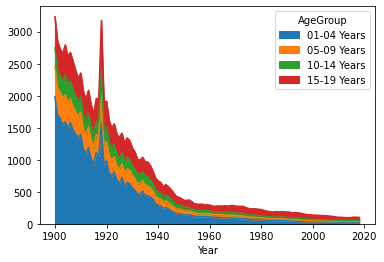

In [14]:
mortality_wide.plot.area()

### Scatter plots

<AxesSubplot:xlabel='Year', ylabel='DeathRate'>

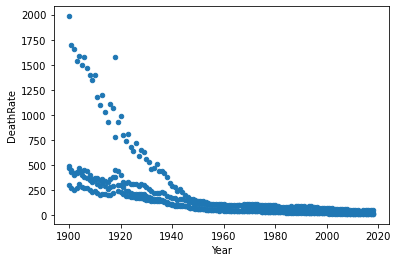

In [15]:
mortality_long.plot.scatter(x='Year', y='DeathRate')

In [16]:
mortality_long.plot.scatter()   # Error: must have x and y parameters

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

KeyError: 'Years'

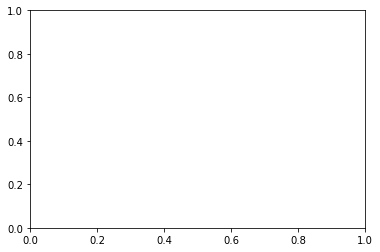

In [17]:
mortality_wide.plot.scatter(x='Years',y='05-09 Years') # Error: 'Year' is in an index

### Bar plots

<AxesSubplot:xlabel='Year'>

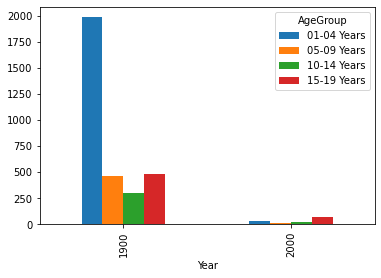

In [18]:
mortality_wide.query('Year in (1900,2000)').plot.bar()

<AxesSubplot:ylabel='Year'>

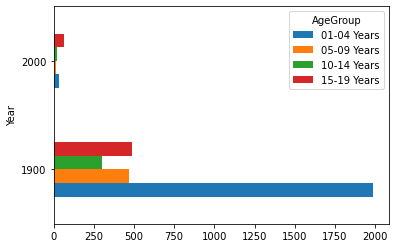

In [19]:
mortality_wide.query('Year in (1900,2000)').plot.barh()

### Histogram and density plots

<AxesSubplot:ylabel='Frequency'>

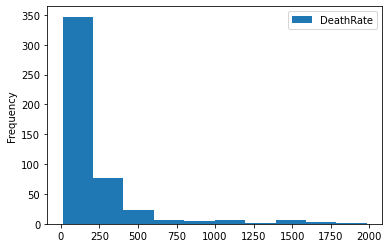

In [20]:
mortality_long.plot.hist(y='DeathRate')

<AxesSubplot:ylabel='Frequency'>

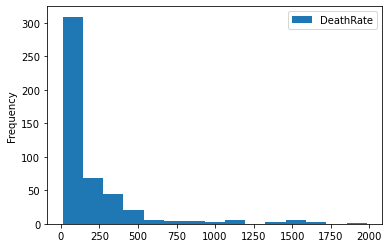

In [21]:
mortality_long.plot.hist(y='DeathRate', bins=15)

(0.0, 2000.0)

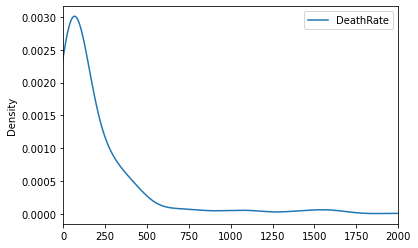

In [23]:
mortality_long.plot.density(y='DeathRate')
plt.xlim([0, 2000])

<AxesSubplot:ylabel='Density'>

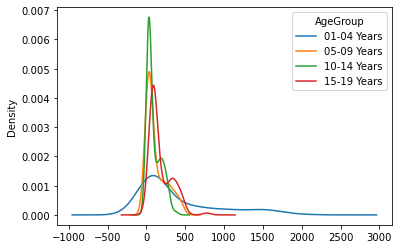

In [24]:
mortality_wide.plot.density()   

### Box plot

<AxesSubplot:>

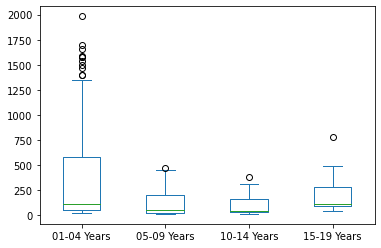

In [25]:
mortality_wide.plot.box()

### Improve the appearance

<AxesSubplot:title={'center':'Child Mortality: 1900-2018'}, xlabel='Year', ylabel='Deaths per 100,000'>

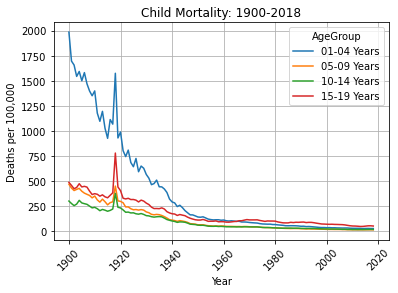

In [26]:
mortality_wide.plot.line(title='Child Mortality: 1900-2018',
                         ylabel='Deaths per 100,000', grid=True, rot=45)

<AxesSubplot:title={'center':'Child Mortality: 2000-2018'}, xlabel='Year', ylabel='Deaths per 100,000'>

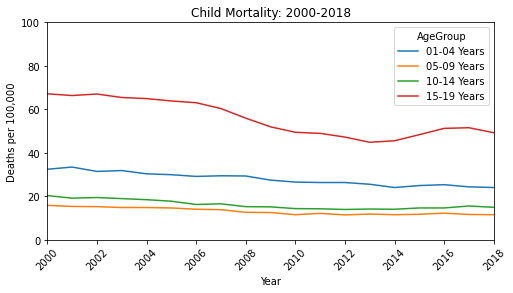

In [28]:
mortality_wide.plot.line(title='Child Mortality: 2000-2018',
     ylabel='Deaths per 100,000', figsize=(8,4), grid=False, rot=45,
     xlim=(2000,2018), ylim=(0,100))

### Subplots

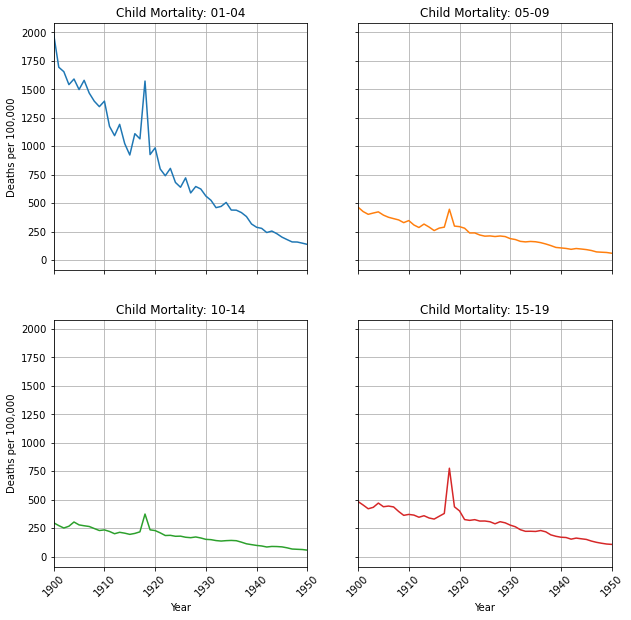

In [30]:
mortality_wide.plot.line(
    title=['Child Mortality: 01-04','Child Mortality: 05-09',
           'Child Mortality: 10-14','Child Mortality: 15-19'],
    ylabel='Deaths per 100,000', sharey=True,
    grid=True, rot=45, xlim=(1900,1950), legend=False,
    subplots=True, layout=(2,2), figsize=(10,10));

### Chaining

<AxesSubplot:ylabel='AgeGroup'>

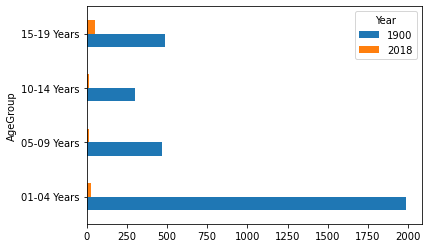

In [31]:
mortality_long.query('Year in (1900,2018)') \
     .pivot(index='AgeGroup', columns='Year', values='DeathRate') \
     .plot.barh()

<AxesSubplot:xlabel='Year', ylabel='Deaths per 100,000'>

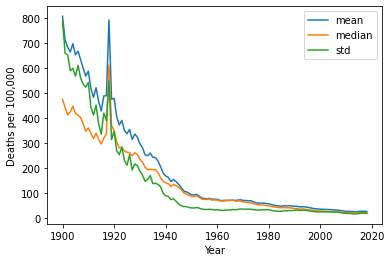

In [32]:
mortality_long.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std']).plot(ylabel='Deaths per 100,000')